1) What is Simple Linear Regression?

Simple Linear Regression (SLR) is a statistical method used to model the relationship between two variables:

i)Independent variable (X): Predictor or input variable.

ii)Dependent variable (Y): Response or output variable.

Example: Predicting a student’s exam score (Y) based on the number of study hours (X).

2. : What are the key assumptions of Simple Linear Regression

The key assumptions of Simple Linear Regression ensure that the model produces reliable and unbiased estimates.

1. Linearity-The relationship between the independent variable (X) and the dependent variable (Y) is linear.

2. Independence of Errors-The residuals (errors) are independent of each other.
No autocorrelation should exist, especially in time-series data.

3. Homoscedasticity (Constant Variance of Errors)-
The variance of residuals should remain constant across all levels of X.
If variance changes (heteroscedasticity), predictions may become unreliable.

4. Normality of Errors- Residuals (errors) should be approximately normally distributed.
Important for valid hypothesis testing and confidence intervals.

5. No Significant Outliers- Extreme values can heavily influence the regression line and distort results.

6. X is Measured Without Error- The independent variable (X) is assumed to be measured accurately, without significant error.

3. What is heteroscedasticity, and why is it important to address in regression
models?

Heteroscedasticity occurs when the variance of residuals (errors) is not constant across all levels of the independent variable(s) in a regression model.
Homoscedasticity - Variance of errors is constant.

Heteroscedasticity - Variance of errors increases or decreases with X (e.g., forms a funnel shape in residual plots).

Why is it important to address?

i)Violates Regression Assumptions
ii)Leads to Inefficient Estimates
iii)Impacts Prediction Accuracy


4) What is Multiple Linear Regression.

Multiple Linear Regression is a statistical technique used to model the relationship between one dependent variable (Y) and two or more independent variables (X₁, X₂, …, Xₙ).
Example-
Predicting house prices (Y) based on:
Size of the house (X₁),
Number of bedrooms (X₂),
Distance to city center (X₃).

5. What is polynomial regression, and how does it differ from linear
regression?

Polynomial Regression is a type of regression analysis where the relationship between the independent variable(s) and the dependent variable is modeled as an nth-degree polynomial.

Key Difference from Linear Regression

Linear Regression: Assumes a straight-line relationship between X and Y.

Polynomial Regression: Models a curved relationship by including higher-order powers of X.


6. : Implement a Python program to fit a Simple Linear Regression model to
the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
Plot the regression line over the data points.


Intercept (β0): 0.18
Slope (β1): 1.98


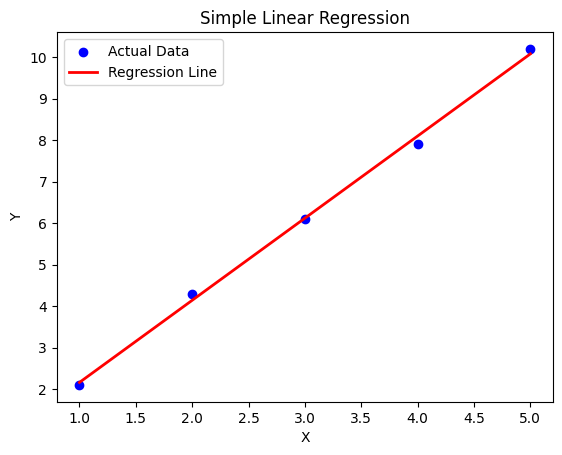

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Reshape for sklearn
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create and fit model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Print slope and intercept
print(f"Intercept (β0): {model.intercept_:.2f}")
print(f"Slope (β1): {model.coef_[0]:.2f}")

# Plotting
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()


7. : Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Sample Data
Area = [1200, 1500, 1800, 2000]
Rooms = [2, 3, 3, 4]
Price = [250000, 300000, 320000, 370000]

# Create DataFrame
df = pd.DataFrame({'Area': Area, 'Rooms': Rooms, 'Price': Price})

# Independent and dependent variables
X = df[['Area', 'Rooms']]
y = df['Price']

# Fit Multiple Linear Regression Model
model = LinearRegression()
model.fit(X, y)

print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficients: {list(zip(X.columns, model.coef_))}")

# --- Multicollinearity Check using VIF ---
# Add constant (intercept) for VIF calculation
X_vif = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]

print("\nVariance Inflation Factor (VIF) Results:")
print(vif_data)


Intercept: 103157.89
Coefficients: [('Area', np.float64(63.15789473684211)), ('Rooms', np.float64(34736.842105263146))]

Variance Inflation Factor (VIF) Results:
  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


8) Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
3
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve.


Intercept: 0.06
Coefficients: [0.   1.94 0.2 ]


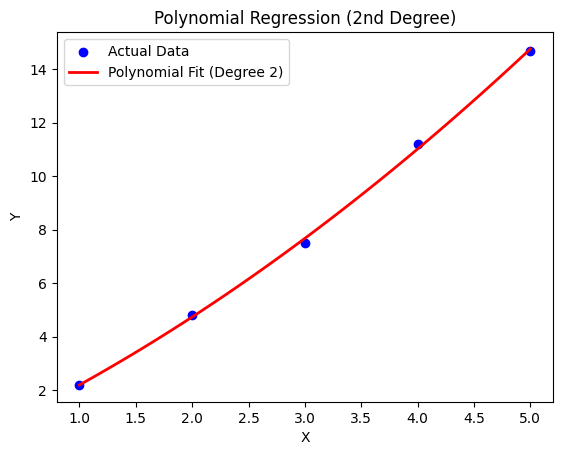

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Transform to include polynomial terms (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit Polynomial Regression model
model = LinearRegression()
model.fit(X_poly, Y)

# Predictions for curve
X_range = np.linspace(1, 5, 100).reshape(-1, 1)
Y_pred = model.predict(poly.transform(X_range))

# Print coefficients
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficients: {model.coef_}")

# Plotting
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X_range, Y_pred, color='red', linewidth=2, label='Polynomial Fit (Degree 2)')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression (2nd Degree)")
plt.legend()
plt.show()


9. Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals.

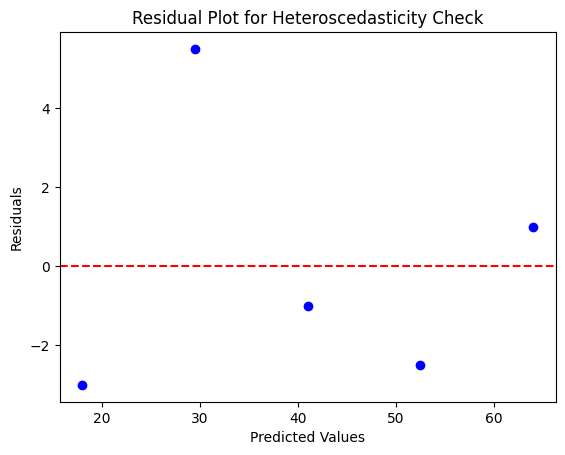

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit Simple Linear Regression Model
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Calculate Residuals
residuals = Y - Y_pred

# Plot Residuals
plt.scatter(Y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Heteroscedasticity Check")
plt.show()


10. Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.


1. Addressing Heteroscedasticity

Heteroscedasticity means residuals have non-constant variance, violating linear regression assumptions.

Steps to Fix

a)Transform the dependent variable (Y)
Apply log, square root, or Box-Cox transformation to stabilize variance.
Example: Y_new = np.log(Y)

b)Use Weighted Least Squares (WLS)
Assign lower weights to points with higher variance.

c)Use Robust Regression Techniques
Example: HuberRegressor or RLM (Robust Linear Models in statsmodels).

d)Check residual plots again after correction to confirm homoscedasticity.

2. Addressing Multicollinearity

Multicollinearity occurs when independent variables are highly correlated, leading to unstable coefficient estimates.

Detection
-Compute Variance Inflation Factor (VIF) for each feature.
-Rule of Thumb:
VIF > 5 - Moderate multicollinearity
VIF > 10 - High multicollinearity (serious concern)

Steps to Fix
i)Remove highly correlated features- Drop one of the correlated variables.
ii)Combine correlated features
Example: Combine Area and Rooms into a new feature like "Area per Room".
iii)Use Regularization Methods- Ridge Regression or Lasso Regression help by penalizing large coefficients and reducing instability.
iv)Principal Component Analysis (PCA)-Reduce dimensionality by converting correlated features into uncorrelated components.

3. Final Model Validation
-Refit the model after corrections.
-Check:
Residual plots for homoscedasticity.
VIF values for reduced multicollinearity.
R², Adjusted R², RMSE for performance.
Cross-validation for generalization.